In [186]:
import pandas as pd

In [187]:
df = pd.read_csv('./train.csv', index_col = 0)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [188]:
def num_nans(df):
    return df.isna().sum().sum()

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 866 rows with at least one empty value


In [189]:
def drop_na(df):
    return df.dropna(axis='columns', thresh=len(df)-200)

df = drop_na(df)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [190]:
def to_numerical(df):
    return df['Sex'].replace({'male':0, 'female':1})

df['Sex'] = to_numerical(df)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [191]:
def extract_names(df):
    df['First Name'] = df['Name'].str.split().str.get(2)
    df['Middle Name'] = df['Name'].str.split().str.get(3)
    df['Last Name'] = df['Name'].str.split(',').str.get(0)
    df['Title'] = df['Name'].str.split(',').str.get(1).str.split('.').str.get(0)
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head(20)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q,James,NaN,Moran,Mr
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs


In [192]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean(axis=0))

df['Age'] = replace_with_mean(df)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


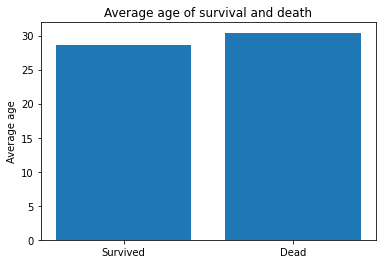

In [193]:
import matplotlib.pyplot as plt
survive = df['Survived'] == 1
dead = df['Survived'] == 0
survived_mean = df.loc[survive, 'Age'].mean()
dead_mean = df.loc[dead, 'Age'].mean()
data = {'Survived':survived_mean, 'Dead':dead_mean}
x = list(data.keys())
y = list(data.values())
plt.ylabel("Average age")
plt.title("Average age of survival and death")
plt.bar(x, y)
plt.show()
# The average age of those that didn't survive is higher than that of the survived

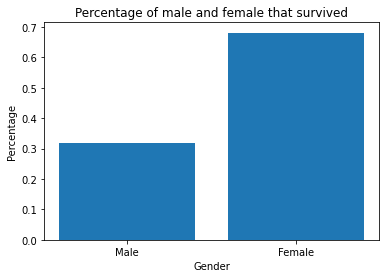

In [194]:
male_count = df.query('Survived==1 & Sex==0')['Sex'].count()
female_count = df.query('Survived==1 & Sex==1')['Sex'].count()
data = {'Male':(male_count/(male_count+female_count)), 'Female':(female_count/(male_count+female_count))}
x = list(data.keys())
y = list(data.values())
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of male and female that survived")
plt.bar(x, y)
plt.show()
# Way more females survived than males

/var/folders/ww/d7wtsh5d2_15mpscsx0sq_m00000gn/T/ipykernel_61639/477276530.py:7: RuntimeWarning: invalid value encountered in long_scalars
  data = {'Mr':(Mr/Sum), 'Mrs':(Mrs/Sum), 'Miss':(Miss/Sum), 'Master':(Master/Sum), 'Dr':(Dr/Sum)}


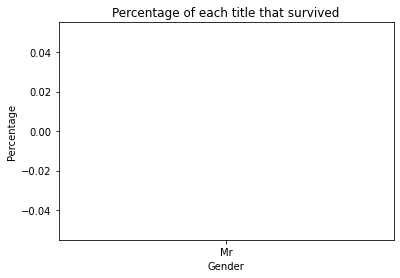

In [195]:
Mr = df.query('Survived==1 & Title=="Mr"')['Title'].count()
Mrs = df.query('Survived==1 & Title=="Mrs"')['Title'].count()
Miss = df.query('Survived==1 & Title=="Miss"')['Title'].count()
Master = df.query('Survived==1 & Title=="Master"')['Title'].count()
Dr = df.query('Survived==1 & Title=="Dr"')['Title'].count()
Sum = Mr + Mrs + Miss + Master + Dr
data = {'Mr':(Mr/Sum), 'Mrs':(Mrs/Sum), 'Miss':(Miss/Sum), 'Master':(Master/Sum), 'Dr':(Dr/Sum)}
x = list(data.keys())
y = list(data.values())
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of each title that survived")
plt.bar(x, y)
plt.show()

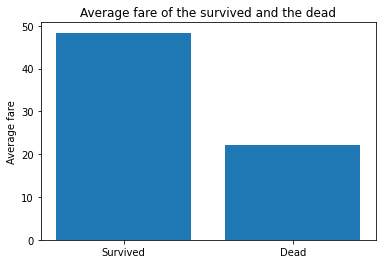

In [196]:
survived_fare_mean = df.loc[survive, 'Fare'].mean()
dead_fare_mean = df.loc[dead, 'Fare'].mean()
data = {'Survived':survived_fare_mean, 'Dead':dead_fare_mean}
x = list(data.keys())
y = list(data.values())
plt.ylabel("Average fare")
plt.title("Average fare of the survived and the dead")
plt.bar(x, y)
plt.show()
# Those survived paid higher fare than those dead

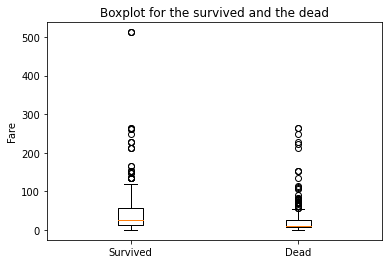

In [197]:
survived_fare = df.loc[survive, 'Fare']
dead_fare = df.loc[dead, 'Fare']
plt.ylabel("Fare")
plt.title("Boxplot for the survived and the dead")
plt.boxplot([survived_fare, dead_fare], labels=("Survived","Dead"))
plt.show()
# Those survived paid higher fare than those dead

In [198]:
def foo(df):
    return (df['Fare']-df['Fare'].mean())/df['Fare'].std()
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


In [199]:
df.drop(df.select_dtypes(exclude='number'), axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,0,22.0,1,0,7.2500
2,1,1,1,38.0,1,0,71.2833
3,1,3,1,26.0,0,0,7.9250
4,1,1,1,35.0,1,0,53.1000
5,0,3,0,35.0,0,0,8.0500


In [200]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
def N_most_similar(df, N):
    l = euclidean_distances(df.to_numpy(), df.to_numpy())
    np.fill_diagonal(l, np.amax(l))
    result = np.where(l == np.amin(l))
    # n = np.size(l) - np.count_nonzero(l)
    return result
#print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

In [201]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""
topic_string = ['python','data science','data analytics','machine learning','deep learning']
def get(topic, n):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic[n], headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get(topic_string, 0)
data_science = get(topic_string, 1)
data_analytics = get(topic_string, 2)
machine_learning = get(topic_string, 3)
deep_learning = get(topic_string, 4)

In [202]:
df_python = pd.json_normalize(python['items'])
df_data_science = pd.json_normalize(data_science['items'])
df_data_analytics = pd.json_normalize(data_analytics['items'])
df_machine_learning = pd.json_normalize(machine_learning['items'])
df_deep_learning = pd.json_normalize(deep_learning['items'])
df_python.to_csv('./df_python.csv', index=False)
df_data_science.to_csv('./df_data_science.csv', index=False)
df_data_analytics.to_csv('./df_data_analytics.csv', index=False)
df_machine_learning.to_csv('./df_machine_learning.csv', index=False)
df_deep_learning.to_csv('./df_deep_learning.csv', index=False)

In [203]:
df_python = df_python.rename({'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, axis=1)
df_data_science = df_data_science.rename({'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, axis=1)
df_data_analytics = df_data_analytics.rename({'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, axis=1)
df_machine_learning = df_machine_learning.rename({'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, axis=1)
df_deep_learning = df_deep_learning.rename({'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, axis=1)

In [204]:
df_python['Topic'] = 'Python'
df_data_science['Topic'] = 'Data Science'
df_data_analytics['Topic'] = 'Data Analytics'
df_machine_learning['Topic'] = 'Machine Learning'
df_deep_learning['Topic'] = 'Deep Learning'

In [205]:
df_merge = pd.concat([df_python, df_data_science, df_data_analytics, df_machine_learning, df_deep_learning])
df_merge.to_csv('./df_merge.csv')
df_merge = df_merge.reset_index(drop=True)

In [206]:
def contain_Data(df):
    return df[df['Title'].str.contains('Data')].index

In [207]:
def author_E(df):
    for i in range(len(df['Authors'])):
        for j in df['Authors'][i]:
            if (j.split()[0][0] == 'E' and j.split()[-1][0] == 'E'):
                return [i].append[i]